In [1]:
import pandas as pd
df = pd.read_csv('c:/data/concrete/concrete.csv')
df.head()

,cement,flag,ash,water,superplastic,coarseagg,findagg,age,strength,class
0,164.2,0.0,200.1,181.2,12.6,849.3,846.0,28,15.09,0
1,164.0,0.0,200.0,181.0,13.0,849.0,846.0,28,15.09,0
2,158.0,0.0,195.0,220.0,11.0,898.0,713.0,28,8.54,0
3,144.0,15.0,195.0,176.0,6.0,1021.0,709.0,28,15.34,0
4,167.0,187.0,195.0,185.0,7.0,898.0,636.0,28,23.89,0


In [2]:
train_cols = df.columns[:-2]
X = df[train_cols]
y = df['class']
y.value_counts()

0    523
1    507
Name: class, dtype: int64

In [3]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['class'])
df2 = pd.concat([X_samp, y_samp], axis=1)
df2['class'].value_counts()

0    507
1    507
Name: class, dtype: int64

In [4]:
X = df2[train_cols]
y = df2['class']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [6]:
#LOGIT
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=0, max_iter=1000)
model1.fit(X_train, y_train)
print('학습용:', model1.score(X_train, y_train))
print('검증용:', model1.score(X_test, y_test))

학습용: 0.8545006165228114
검증용: 0.8472906403940886


In [7]:
#판별함수: 음수 - 0, 양수 - 1
print(model1.decision_function(X_test[:5]))
print(model1.predict(X_test[:5])) # 판별함수 값 < 0: 0, 판별함수 값 > 0: 1

[-0.24584777  0.55042918  3.4726553  -2.29055759 -1.64685025]
[0 1 1 0 0]


In [8]:
#SVM
from sklearn.svm import SVC
model2 = SVC(random_state=0)
model2.fit(X_train, y_train)
print('학습용:', model2.score(X_train, y_train))
print('검증용:', model2.score(X_test, y_test))

학습용: 0.7965474722564735
검증용: 0.7783251231527094


In [9]:
#판별함수
print(model2.decision_function(X_test[:5]))
print(model2.predict(X_test[:5])) # 판별함수 값 < 0: 0, 판별함수 값 > 0: 1

[ 0.19785425 -0.0661367   1.24271839 -0.8637905  -0.276197  ]
[1 0 1 0 0]


In [10]:
#의사결정나무
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(random_state=0)
model3.fit(X_train, y_train)
print('학습용:', model3.score(X_train, y_train))
print('검증용:', model3.score(X_test, y_test))

학습용: 0.9975339087546239
검증용: 0.916256157635468


In [11]:
model3.predict_proba(X_test)[:,1]

array([0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       1.        , 0.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.66666667, 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.     

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, model1.decision_function(X_test))
fpr2, tpr2, thresholds2 = roc_curve(y_test, model2.decision_function(X_test))
fpr3, tpr3, thresholds3 = roc_curve(y_test, model3.predict_proba(X_test)[:,1])

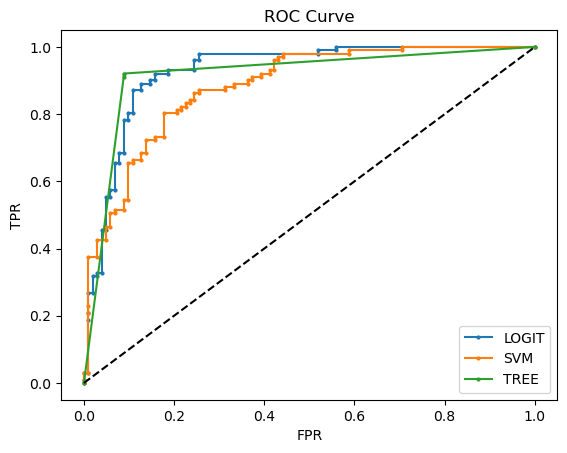

In [17]:
#ROC Curve
plt.plot(fpr1, tpr1, 'o-', ms=2, label='LOGIT')
plt.plot(fpr2, tpr2, 'o-', ms=2, label='SVM')
plt.plot(fpr3, tpr3, 'o-', ms=2, label='TREE')
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [19]:
#AUC
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2), auc(fpr3, tpr3)

(0.9274898078043099, 0.8823529411764706, 0.9158415841584158)